## Chapter 6:: Decision Tree

Training and Visualizing Decision Tree

In [1]:
%pip install scikit-learn pandas numpy #scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


In [2]:
#from sklearnex import patch_sklearn
#patch_sklearn()

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_iris, y_iris)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

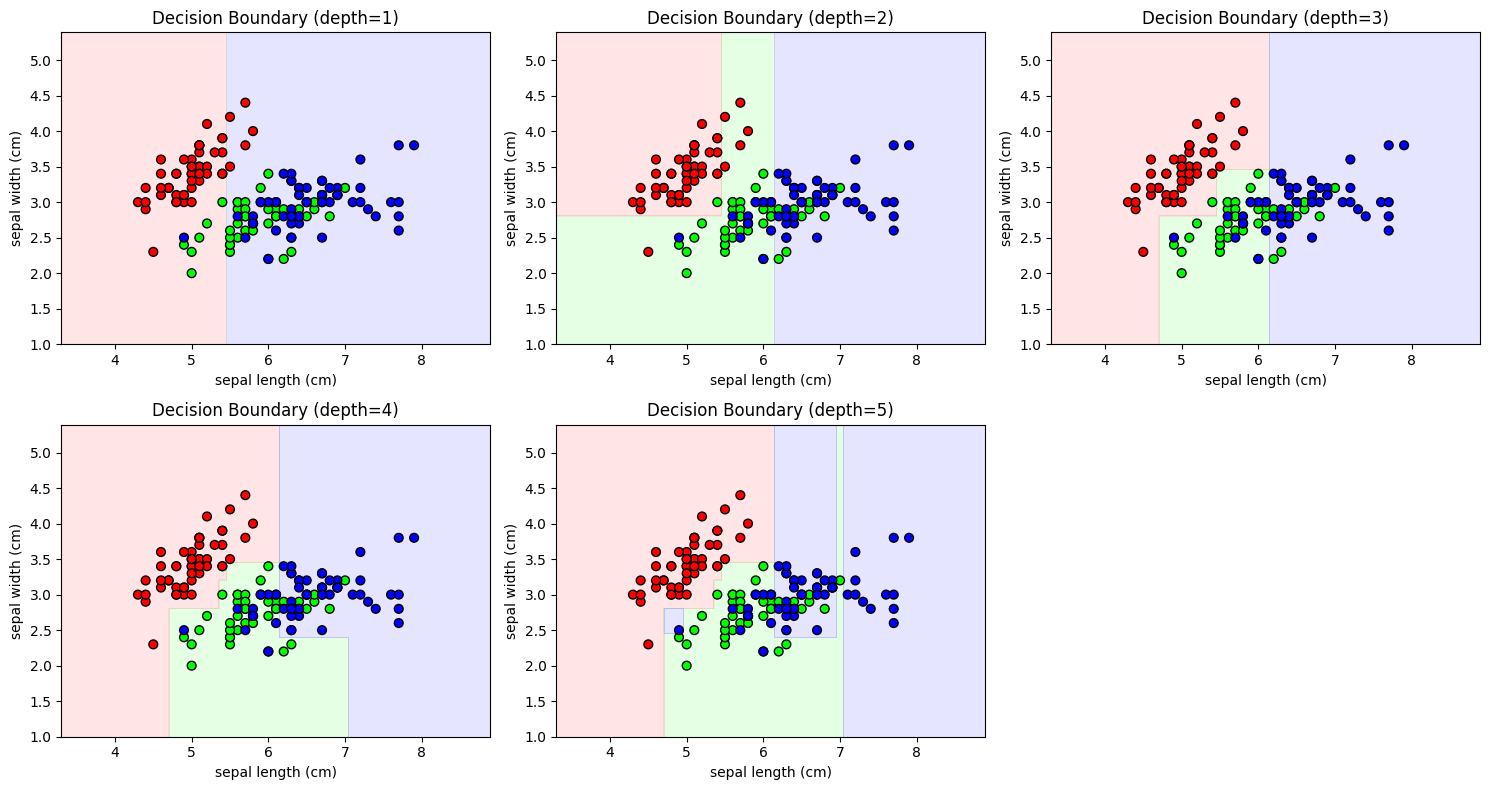

In [8]:
# Plot decision boundaries for different tree depths to visualize the effect of max_depth
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = X_iris[:, :2]
y = y_iris

depths = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 8))
for i, depth in enumerate(depths, 1):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'Decision Boundary (depth={depth})')
plt.tight_layout()
plt.show()

----
Regression

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg= DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0
